# 图像卷积
## 互相关运算
卷积层本身是一种互相关运算
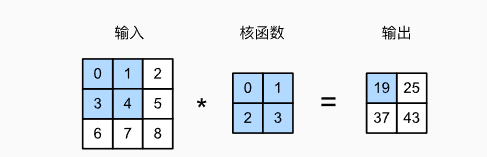
## 卷积层
卷积层对输入和卷积核权重进行互相关运算，并在添加标量偏置之后产生输出。 所以，卷积层中的两个被训练的参数是卷积核权重和标量偏置。 就像我们之前随机初始化全连接层一样，在训练基于卷积层的模型时，我们也随机初始化卷积核权重。



In [14]:
import torch
from torch import nn

"""
定义二维互相关运算
"""
def corr2d(X,K):
    h,w=K.shape
    Y=torch.zeros((X.shape[0]-h+1,X.shape[1]-w+1))
    for i in range (Y.shape[0]):
        for j in range (Y.shape[1]):
            Y[i,j]=(X[i:i+h,j:j+w]*K).sum()
    return Y

X=torch.tensor([[0,1,2],[3,4,5],[6,7,8]])
K=torch.tensor([[0,1],[2,3]])
y=corr2d(X,K)

# print(y)
"""
定义二维卷积层类，继承nn.Module类
"""
class Conv2D(nn.Module):
    def __init__(self, kernal_size):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(kernal_size))
        self.bias=nn.Parameter(torch.zeros(1))
    
    def forward(self,X):
        return corr2d(X,self.weight)+self.bias
    
class Conv2Dt(nn.Module):
    def __init__(self,in_channels,out_channels,kernal_size,stride):
        super(Conv2Dt,self).__init__() #显示调用父类的构造函数
        self.conv=nn.Conv2d(in_channels,out_channels,kernal_size,stride)

    def forward(self,X):
        return self.conv(X)
    
x1=torch.ones((6,8))
x1[:,2:6]=0
# print(x1)

k1=torch.tensor([[1,-1]])
y1=corr2d(x1,k1)
# print(y1)

###############################################
##### 学习卷积核
###############################################
x1=x1.reshape(1,1,6,8)
y1=y1.reshape(1,1,6,7) # y1缩小了一列
conv2d=nn.Conv2d(1,1,kernel_size=(1,2),bias=False)
lr=3e-2 #设置学习率
for i in range(100):
    y_hat=conv2d(x1)
    l=(y_hat-y1)**2
    conv2d.zero_grad() #清零梯度
    l.sum().backward() #反向传播
    conv2d.weight.data[:]-=lr*conv2d.weight.grad
    # if (i+1)%2==0:
        # print(f'epoch {i+1}, loss {l.sum():.3f}')
print(conv2d.weight.data.reshape(1,2))

tensor([[ 1.0000, -1.0000]])
